In [1]:
def load_concat_csv(paths):
    
    header = ['first_kill', 'time', 'first_death', 'spike_plant', 'defuse', 'fb_team', 'fb_players', 'dt_players',
              'team_buy', 'oppo_buy', 'total_kills', 'total_deaths', 'awps_info', 'side', 'round_win']

    df = pd.DataFrame()
    for path in paths:
        data = pd.read_csv(path)
        df = pd.concat([df, data], axis=0)
    
    return df

# Practistics Analytics Template
This is a template made for use with Practistics scrim data. Instructions: <br>
-- Load as many scrim CSVs (of the same map) as required into a directory.<br>
-- Paste the file paths of all the CSVs into the read CSVs function. <br>
-- Execute all the cells for the required analytics each cell provides.<br>
-- Do not edit anything else unless you know what you're doing.<br>

In [2]:
!pip install matplotlib -q
!pip install seaborn -q
!pip install pandas -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

## Loading CSVs:
Enter all the file paths of the CSVs here, how many ever there are:  <br>
(Make sure all the paths are inside the `[ ]` square brackets, surrounded by `' '` marks, and seperated by `,` commas)

**Example:**

>path_list = ['D:\PROJECTS\practistics-template\08_09_2023_Split_9-13.csv', 'D:\PROJECTS\practistics-template\08_09_2023_Split_13-9.csv']

In [4]:
path_list = [r'D:\PROJECTS\practistics-template\08_09_2023_Split_9-13.csv', r'D:\PROJECTS\practistics-template\08_09_2023_Split_13-9.csv', r'D:\PROJECTS\practistics-template\split_22_08_2023_time_12_56.csv', r'D:\PROJECTS\practistics-template\08_09_2023_Split_10-13.csv', r'D:\PROJECTS\practistics-template\10_09_2023_Split_13-11.csv']

df = load_concat_csv(path_list)

df.team_buy = df.team_buy.str.replace(',','')
df.oppo_buy = df.oppo_buy.str.replace(',','')
df.time = df.time.str.replace('0:0','')
df.time = df.time.str.replace('0:','')
df.time = df.time.str.replace('.','')

df.team_buy = df.team_buy.astype(int)
df.time = df.time.astype(int)
df.oppo_buy = df.oppo_buy.astype(int)

sepe = "------------------------------"

df

,first_kill,time,first_death,spike_plant,defuse,fb_team,fb_players,dt_players,team_buy,oppo_buy,total_kills,total_deaths,awps_info,side,round_win
0,Raze,32,Cypher,B,True,team,BOIt OP,PavamaN,800,700,1,5,none,Attack,loss
1,Sage,38,Gekko,False,False,opponent,Sasta rossi,bhooka,600,2600,0,5,none,Attack,loss
2,Sage,9,Viper,A,True,opponent,Sasta rossi,SadScientist,4200,3200,4,5,none,Attack,loss
3,Raze,7,Raze,False,False,team,BOIt OP,BOIt OP,3300,4600,6,4,none,Attack,win
4,Raze,4,Raze,B,False,opponent,BOIt OP,tam0w,3900,3400,5,4,none,Attack,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Reyna,16,Raze,B,False,opponent,Sama 70,PsychoXClown,4900,3600,4,5,team,Defense,loss
20,Raze,4,Sage,B,False,opponent,KinGG,NEROO,4300,4100,3,5,none,Defense,loss
21,Raze,4,Raze,A,False,opponent,KinGG,PsychoXClown,1800,4400,0,5,none,Defense,loss
22,Sage,40,Killjoy,False,False,team,NaN,MiCkeY,4500,4600,5,0,none,Defense,win


# Analytics:

We will now run different standard queries on the given loaded dataset to give us various bits of information regarding scrim performances.

## Basics Stats:
Basic computations performed on your dataset based on the whole map.


1) Attack Side vs Def Side Win rate

In [14]:
win_percent = float("{:.2f}".format((df['round_win'].value_counts().get('win', 0) / df['round_win'].count() * 100)))
print(f"Round Win %: {win_percent}%")

print(sepe)

attack_win_pct = float("{:.2f}".format((df[df['side'] == "Attack"]['round_win'].value_counts().get('win', 0) / df[df['side'] == "Attack"]['round_win'].count() * 100)))
print(f"Attack Win %: {attack_win_pct}%")

def_win_pct = float("{:.2f}".format((df[df['side'] == "Defense"]['round_win'].value_counts().get('win', 0) / df[df['side'] == "Defense"]['round_win'].count() * 100)))
print(f"Defense Win %: {def_win_pct}%")

print(sepe)

anti_ecos_lost = df.query('team_buy >= 3500 & oppo_buy <= 2700')['round_win'].value_counts().get('loss', 0)
total_ecos_opp = df.query('team_buy >= 3500 & oppo_buy <= 2000')['round_win'].count()
eco_wins_pct = float("{:.2f}".format(anti_ecos_lost / total_ecos_opp * 100))
print(f"Anti-Eco Loss %: {eco_wins_pct}% ({anti_ecos_lost}/{total_ecos_opp})")

eco_wins = df.query('oppo_buy >= 3500 & team_buy <= 2700')['round_win'].value_counts().get('win', 0)
total_ecos_team = df.query('oppo_buy >= 3500 & team_buy <= 2700')['round_win'].count()
eco_wins_pct = float("{:.2f}".format(eco_wins / total_ecos_team * 100))
print(f"Eco Win %: {eco_wins_pct}% ({eco_wins}/{total_ecos_team})")

print(sepe)

post_plants_wins = df.query('(spike_plant == "A" | spike_plant == "B") & side == "Attack"')['round_win'].value_counts().get('win', 0)
total_post_plants = df.query('(spike_plant == "A" | spike_plant == "B") & side == "Attack"')['round_win'].count()
pp_win_pct = float("{:.2f}".format(post_plants_wins / total_post_plants * 100))
print(f"Post-Plant Win %: {pp_win_pct}% ({post_plants_wins}/{total_post_plants})")

retake_wins = df.query('(spike_plant == "A" | spike_plant == "B") & side == "Defense"')['round_win'].value_counts().get('win', 0)
total_retakes = df.query('(spike_plant == "A" | spike_plant == "B") & side == "Defense"')['round_win'].count()
retake_win_pct = float("{:.2f}".format(retake_wins / total_retakes * 100))
print(f"Retake Win %: {retake_wins}% ({retake_wins}/{total_retakes})")


Round Win %: 43.81%
------------------------------
Attack Win %: 43.1%
Defense Win %: 44.68%
------------------------------
Anti-Eco Loss %: 57.14% (8/14)
Eco Win %: 0.0% (0/12)
------------------------------
Post-Plant Win %: 77.78% (21/27)
Retake Win %: 1% (1/23)


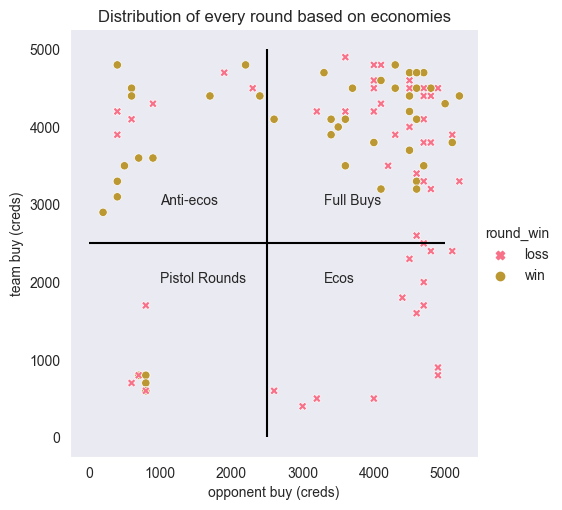

In [6]:
sns.set_palette("husl") 
sns.relplot(df, x=df['oppo_buy'],y=df['team_buy'],hue=df['round_win'],style=df['round_win'], style_order=['win','loss'])
plt.xlabel('opponent buy (creds)')
plt.ylabel('team buy (creds)')
plt.title('Distribution of every round based on economies')
plt.text(x=1000,y=2000,s='Pistol Rounds')
plt.text(x=3300,y=2000,s='Ecos')
plt.text(x=1000,y=3000,s='Anti-ecos')
plt.text(x=3300,y=3000,s='Full Buys')
plt.hlines(2500,xmin=0,xmax=5000, colors='black')
plt.vlines(2500,ymin=0,ymax=5000, colors='black')
plt.show()

## Site-Based Stats:

Basic stats about each site that provide insight on if there are any weaknesses in certain setups based on low round winrates when using those setups (certain retake setups, or certain site postplants etc)

### A-Site Stats:

In [7]:
a_def_won = df.query('side == "Defense" & spike_plant == "A"')['round_win'].value_counts()['win']
a_plants = df.query('side == "Defense" & spike_plant == "A"')['round_win'].count()
plants = df.query('side == "Defense" & (spike_plant == "A" | spike_plant == "B")')['round_win'].count()
a_retake_pct = float("{:.2f}".format(a_def_won / a_plants * 100))
a_concede_pct = float("{:.2f}".format(a_plants / plants * 100))

print(f"A Retake %: {a_retake_pct}% ({a_def_won}/{a_plants})")
print(f"A Site Concede %: {a_concede_pct}% ({a_plants}/{plants})")

post_plants_wins = df.query('spike_plant == "A" & side == "Attack"')['round_win'].value_counts()['win']
total_post_plants = df.query('spike_plant == "A" & side == "Attack"')['round_win'].count()
pp_win_pct = float("{:.2f}".format(post_plants_wins / total_post_plants * 100))
print(f"A Post-Plant Win %: {pp_win_pct}% ({post_plants_wins}/{total_post_plants})")


A Retake %: 7.69% (1/13)
A Site Concede %: 56.52% (13/23)
A Post-Plant Win %: 84.62% (11/13)


### B-Site Stats:

In [8]:
b_def_won = df.query('side == "Defense" & spike_plant == "B"')['round_win'].value_counts()['loss']
b_plants = df.query('side == "Defense" & spike_plant == "B"')['round_win'].count()
plants = df.query('side == "Defense" & (spike_plant == "A" | spike_plant == "B")')['round_win'].count()
b_retake_pct = float("{:.2f}".format(b_def_won / b_plants * 100))
b_concede_pct = float("{:.2f}".format(b_plants / plants * 100))

print(f"B Retake %: {b_retake_pct}% ({b_def_won}/{b_plants})")
print(f"B Site Concede %: {b_concede_pct}% ({b_plants}/{plants})")

post_plants_wins = df.query('spike_plant == "B" & side == "Attack"')['round_win'].value_counts()['win']
total_post_plants = df.query('spike_plant == "B" & side == "Attack"')['round_win'].count()
pp_win_pct = float("{:.2f}".format(post_plants_wins / total_post_plants * 100))
print(f"B Post-Plant Win %: {pp_win_pct}% ({post_plants_wins}/{total_post_plants})")

B Retake %: 100.0% (10/10)
B Site Concede %: 43.48% (10/23)
B Post-Plant Win %: 71.43% (10/14)


## Agents that take the best fights

A plot of first kill rate vs first death rate / all the rounds played. The ideal duelists will be plotted on the bottom right. <br>
(This graphs calculates the FKR and FDR of each agent based on all the rounds of every scrim fed into this dataset, so it makes more sense if all the scrims had the same agent composition)

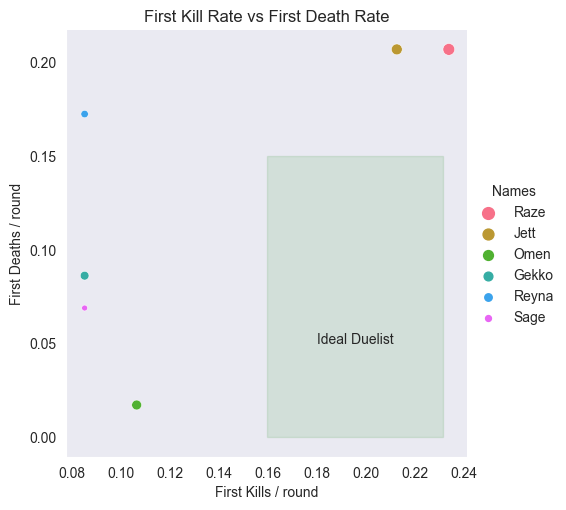

In [9]:
fkr = df.query('fb_team == "team"')['first_kill'].value_counts(normalize=True)
fdr = df.query('fb_team == "opponent"')['first_death'].value_counts(normalize=True)
fkr = pd.DataFrame(fkr).reset_index()
fdr = pd.DataFrame(fdr).reset_index()
fkr.columns = ["Names", "fkr"]
fdr.columns = ["Names", "fdr"]
test = pd.merge(fkr,fdr,on='Names', how='inner').head(6)
sns.relplot(test, x='fkr',y='fdr', size='Names', hue='Names')
plt.xlabel('First Kills / round')
plt.ylabel('First Deaths / round')
plt.title('First Kill Rate vs First Death Rate')
plt.axhspan(0,0.15,0.5,0.94, color='green', alpha=0.1)
plt.text(x=0.18,y=0.05,s='Ideal Duelist')
plt.show()

## First Blood Info

Information about first bloods and how round winrates are affected.<br>

True FB % is the percentage of first kills that are exclusively obtained by **duelists**.

In [10]:
early = df.query('time <= 10 & fb_team == "team"')
early_wins = early.round_win.value_counts()['win']
early_total = early.round_win.count()
early_win_pct = float("{:.2f}".format((early_wins / early_total) * 100))
print(f'Winrate when the first kill is in the first 10 seconds: {early_win_pct}% ({early_wins}/{early_total})')

mid = df.query('20 > time > 10 & fb_team == "team"')
mid_wins = mid.round_win.value_counts()['win']
mid_total = mid.round_win.count()
mid_win_pct = float("{:.2f}".format((mid_wins / mid_total) * 100))
print(f'Winrate when the first kill is between 10-20 seconds of the round: {mid_win_pct}% ({mid_wins}/{mid_total})')

late = df.query('time >= 20 & fb_team == "team"')
late_wins = late.round_win.value_counts()['win']
late_total = late.round_win.count()
late_win_pct = float("{:.2f}".format((late_wins / late_total) * 100))
print(f'Winrate when the first kill is after 20 seconds: {late_win_pct}% ({late_wins}/{late_total})')

print(sepe)

true_fb = df.query('fb_team == "team" & (first_kill == "Raze" | first_kill == "Jett" | first_kill == "Reyna" | first_kill == "Neon" | first_kill == "Yoru" | first_kill == "Phoenix")')
fb = df.query('fb_team == "team"')
true_fb_pct = float("{:.2f}".format((true_fb.count()[0] / fb.count()[0]) * 100))
print(f"True FB %: {true_fb_pct} ({true_fb.count()[0]} / {fb.count()[0]})")

Winrate when the first kill is in the first 10 seconds: 81.82% (18/22)
Winrate when the first kill is between 10-20 seconds of the round: 50.0% (7/14)
Winrate when the first kill is after 20 seconds: 54.55% (6/11)
------------------------------
True FB %: 53.19 (25 / 47)


In [11]:
df['counts'] = pd.cut(df['time'], bins=[0,5,10,15,20,25,30,35,40,45,50])


# test = df.counts.value_counts().sort_index().reset_index()
# test
# test = pd.DataFrame(test)
# test.columns = ['Seconds', 'Frequency']
# test.dtypes
# # print(test)
# sns.barplot(data=test,x=test.Value, y=test.Frequency)
# # 
# # plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Series Plot')
# 
# # Show the plot
# plt.show()

In [12]:
# fraud = pd.DataFrame()
# fraud[['kills','deaths','team_buy','oppo_buy','round_win']] = df.query('index == 3 | index == 2')[['total_kills','total_deaths','team_buy','oppo_buy','round_win']]
# fraud = fraud.reset_index(names='Round')
# fraud['game'] = (fraud.index // 2) + 1
# fraud['spent'] = (fraud.team_buy // 1000)
# fraud['round_win_enc'] = fraud['round_win'].replace(['loss','win'],[0,1])
# sns.scatterplot(fraud[fraud.spent > 0],x='spent',y='deaths', color='brown')

# sns.relplot(fraud, x='deaths',y= 'round_win_enc', hue='Round', col='game', col_wrap=2)